## Hierarchical

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [2]:
crime=pd.read_csv('crime_data.csv')

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime2=crime.iloc[:,1:]

In [5]:
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)

In [7]:
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [8]:
crime2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
crime2_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


In [10]:
crime2_norm[crime2_norm.duplicated()]

,Murder,Assault,UrbanPop,Rape


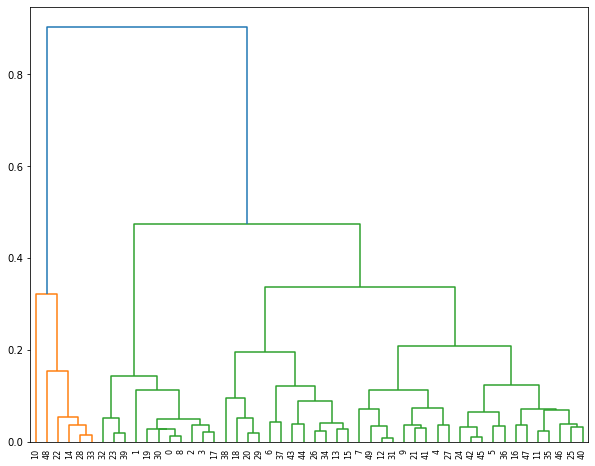

In [11]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(crime2_norm,method='complete'))

In [12]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [13]:
y_hc=hc.fit_predict(crime2_norm)

In [14]:
y_hc

array([2, 2, 2, 2, 1, 1, 3, 1, 2, 1, 0, 1, 1, 3, 0, 3, 1, 2, 3, 2, 3, 1,
       0, 2, 1, 1, 3, 1, 0, 3, 2, 1, 2, 0, 3, 1, 1, 3, 3, 2, 1, 1, 1, 3,
       3, 1, 1, 1, 0, 1], dtype=int64)

In [15]:
crime2['clusters']=y_hc

In [16]:
crime2['clusters'].value_counts()

1    21
3    12
2    11
0     6
Name: clusters, dtype: int64

In [17]:
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


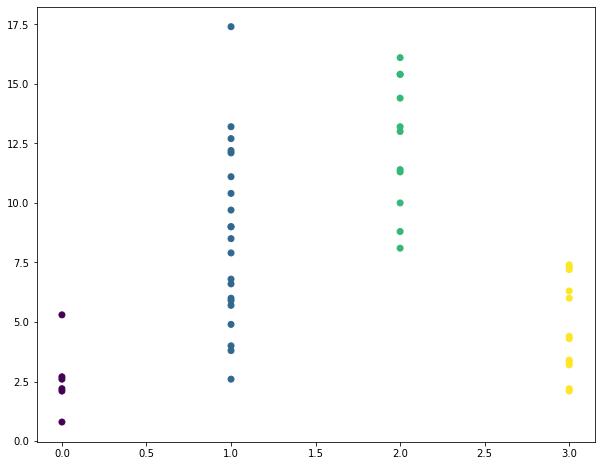

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(crime2['clusters'],crime2['Murder'],c=y_hc)

## KMeans Clustering

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [20]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [21]:
crime2=crime.iloc[:,1:]
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [22]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)

In [23]:
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

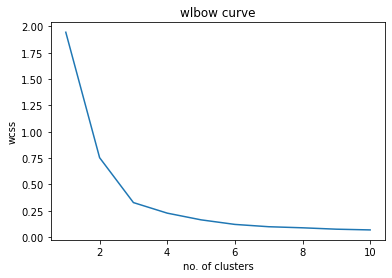

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('wlbow curve')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')

In [25]:
model=KMeans(4,random_state=7).fit(crime2_norm)

In [26]:
model

KMeans(n_clusters=4, random_state=7)

In [27]:
model.labels_

array([2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 1, 0, 2, 3, 1, 3, 0, 2, 3, 2, 3, 2,
       1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 3,
       3, 0, 0, 0, 1, 0])

In [28]:
crime2['clusters']=model.labels_

In [29]:
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [30]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.542857,145.285714,63.500000,20.107143
1,1,2.616667,54.833333,62.000000,12.333333
2,2,12.021053,260.526316,66.421053,27.694737
3,3,4.881818,111.363636,68.545455,16.354545


In [31]:
crime2_norm=pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape,clusters
0,0.054030,0.965983,0.237403,0.086775,0.008186
1,0.036871,0.969713,0.176982,0.164077,0.007374
2,0.026438,0.959603,0.261117,0.101183,0.006528
3,0.044525,0.961342,0.252985,0.098664,0.010119
4,0.030656,0.940112,0.309965,0.138292,0.006812
5,0.035594,0.919142,0.351437,0.174367,0.000000
6,0.024480,0.816000,0.571200,0.082342,0.022255
7,0.023673,0.954935,0.288888,0.063395,0.008025
8,0.044478,0.967530,0.231052,0.092132,0.005776
9,0.078530,0.952294,0.270794,0.116442,0.009026


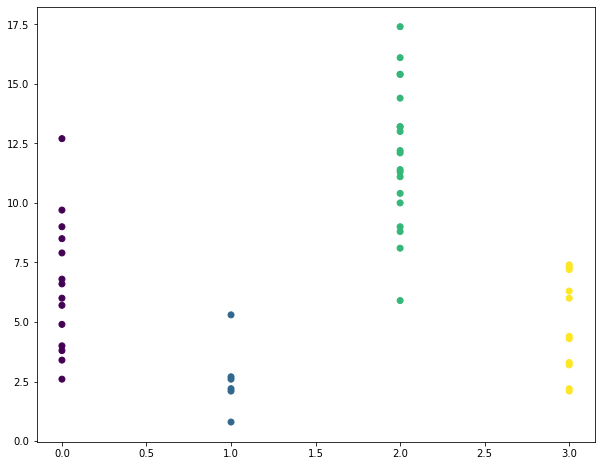

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(crime2['clusters'],crime2['Murder'],c=model.labels_)

## DBScan

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [34]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [35]:
crime2=crime.iloc[:,1:]
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [36]:
crime2_norm=StandardScaler().fit_transform(crime2)
crime2_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [37]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime2_norm)

DBSCAN(eps=1, min_samples=4)

In [38]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [39]:
crime2['clusters']=dbscan.labels_

In [40]:
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [41]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


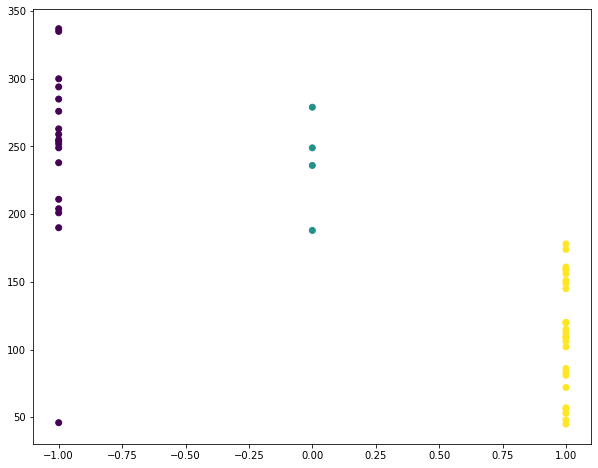

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(crime2['clusters'],crime2['Assault'],c=dbscan.labels_)